# Análisis Exploratorio de Datos de Juzgado 10

In [121]:
from pathlib import Path
import pandas as pd
import sys
project_dir = Path().resolve().parents[0]
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

## 1. Carga de Datos

In [122]:
df_xlsx_17 = pd.read_excel(str(project_dir) + '/data/juz10/'+ "set_de_datos_resoluciones_jpcyf10_2017.ods.xlsx")
df_xlsx_18 = pd.read_excel(str(project_dir) + '/data/juz10/'+ "set_de_datos_resoluciones_jpcyf10_2018.xlsx")

In [123]:
print('En 2017 tenemos {} casos'.format(df_xlsx_17.shape[0]))
print('En 2018 tenemos {} casos'.format(df_xlsx_18.shape[0]))

En 2017 tenemos 562 casos
En 2018 tenemos 1180 casos


In [124]:
list(df_xlsx_17.columns.values)

['N',
 'NRO. REGISTRO',
 'TOMO',
 'FECHA RESOLUCION',
 'NRO_EXPTE_JUSCABA',
 'MATERIA',
 'ARTICULO_INFRINGIDO',
 'TIPO_DE_RESOLUCION',
 'OBJETO_DE_LA_RESOLUCION ',
 'DETALLE',
 'DECISION',
 'LINK',
 'Unnamed: 12']

In [125]:
df_xlsx_17.columns = ['N',
 'NRO._REGISTRO',
 'TOMO',
 'FECHA_RESOLUCION',
 'NRO_EXPTE_EJE',
 'MATERIA',
 'ARTICULO_INFRINGIDO',
 'TIPO_DE_RESOLUCION',
 'OBJETO_DE_LA_RESOLUCION ',
 'DETALLE',
 'DECISION',
 'LINK',
 'Unnamed: 12']

In [126]:
list(df_xlsx_18.columns.values)

['N',
 'NRO._REGISTRO',
 'TOMO',
 'FECHA_RESOLUCION',
 'NRO_EXPTE_EJE',
 'MATERIA',
 'ARTICULO_INFRINGIDO',
 'CONDUCTA',
 'TIPO_DE_RESOLUCION',
 'OBJETO_DE_LA_RESOLUCION',
 'DETALLE',
 'DECISION',
 'ORAL_O_ESCRITA',
 'HORA_DE_INICIO',
 'HORA_DE_CIERRE',
 'DURACION',
 'LINK',
 'SI/NO_Recurrente',
 'Decisión ',
 'Nº Registro y Tomo',
 'Link',
 'SI/NO y Recurrente',
 'Decisión de Admisibilidad (Cámara)',
 'Nº Registro y Tomo.1',
 'Link.1',
 'Decisión de Fondo (TSJ)',
 'Nº Registro y Tomo.2',
 'SI/NO y quien',
 'Confirma/Revoca/Confirma parcialmente/Rechazo in limine',
 'Nº Registro y Tomo.3']

In [127]:
list(set(df_xlsx_17.columns.values).intersection(df_xlsx_18.columns.values))

['DECISION',
 'NRO._REGISTRO',
 'N',
 'MATERIA',
 'DETALLE',
 'LINK',
 'FECHA_RESOLUCION',
 'ARTICULO_INFRINGIDO',
 'NRO_EXPTE_EJE',
 'TIPO_DE_RESOLUCION',
 'TOMO']

Exploramos el contenido

In [128]:
df_18 = df_xlsx_18[['DECISION','NRO._REGISTRO','N','MATERIA',
         'DETALLE','LINK','FECHA_RESOLUCION','ARTICULO_INFRINGIDO',
            'NRO_EXPTE_EJE','TIPO_DE_RESOLUCION','TOMO']]

In [129]:
df_17 = df_xlsx_17[['DECISION','NRO._REGISTRO','N','MATERIA',
         'DETALLE','LINK','FECHA_RESOLUCION','ARTICULO_INFRINGIDO',
            'NRO_EXPTE_EJE','TIPO_DE_RESOLUCION','TOMO']]

In [130]:
df_xlsx = df_17.append(df_18)

In [131]:
df_xlsx.shape

(1742, 11)

## 2. Exploramos las distintas variables

### 2.1 Fechas

In [132]:
df_xlsx.dropna(subset=['FECHA_RESOLUCION'], inplace=True)

In [133]:
# Corregimos algunos datos
df_xlsx['FECHA_RESOLUCION'].replace('14_08_17','14_08_2017', inplace=True)
df_xlsx['FECHA_RESOLUCION'].replace('28_02_18','28_02_2018', inplace=True)
df_xlsx['FECHA_RESOLUCION'].replace('04_09_18','04_09_2018', inplace=True)
df_xlsx['FECHA_RESOLUCION'].replace('06_09_18','06_09_2018', inplace=True)
df_xlsx['FECHA_RESOLUCION'].replace('10_09_18','10_09_2018', inplace=True)
# Valor 18_19_2017 no tiene formato de fecha
df_xlsx['FECHA_RESOLUCION'].replace('18_19_2017',None, inplace=True)
df_xlsx.dropna(subset=['FECHA_RESOLUCION'], inplace=True)

In [134]:
df_xlsx['FECHA_RESOLUCION']=df_xlsx['FECHA_RESOLUCION'].apply(lambda x: datetime.strptime(x, '%d_%m_%Y').strftime('%m-%d-%Y'))

In [135]:
df_xlsx['FECHA_RESOLUCION'] = pd.to_datetime(df_xlsx['FECHA_RESOLUCION'])

In [136]:
df_xlsx['FECHA_RESOLUCION'].head()

0   2017-01-09
1   2017-01-12
2   2017-01-16
3   2017-01-12
4   2017-01-17
Name: FECHA_RESOLUCION, dtype: datetime64[ns]

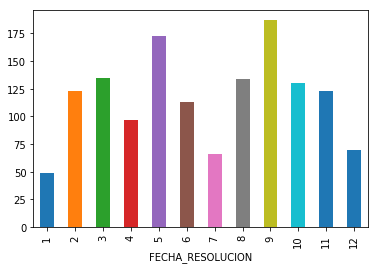

In [137]:
df_xlsx['FECHA_RESOLUCION'].groupby(df_xlsx['FECHA_RESOLUCION'].dt.month).count().plot(kind="bar")

In [138]:
df_xlsx['FECHA_RESOLUCION'].min()

Timestamp('2016-12-29 00:00:00')

In [139]:
df_xlsx['FECHA_RESOLUCION'].max()

Timestamp('2018-12-05 00:00:00')

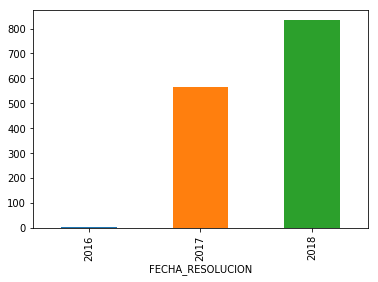

In [140]:
df_xlsx['FECHA_RESOLUCION'].groupby(df_xlsx['FECHA_RESOLUCION'].dt.year).count().plot(kind="bar")

### 2.2 Distribución de Causa

In [143]:
df_xlsx['exp_unico'] = df_xlsx['NRO_EXPTE_EJE'].astype(str) +'T_'+ df_xlsx['TOMO'].astype(str)

In [144]:
df_xlsx.exp_unico.head()

0    17545_16T_5.0
1      176_17T_5.0
2      182_17T_5.0
3      494_17T_5.0
4      566_17T_5.0
Name: exp_unico, dtype: object

Estudiamos cuantas causas tienen expedientes que aparecen mas de una ves en la tabla.

In [145]:
df_xlsx.groupby('exp_unico', sort=True).size().to_frame('count').groupby('count').size().to_frame('casos')

,casos
count,
1,965
2,128
3,25
4,13
5,4
6,4
8,1


### 2.3 Distribución por Materia

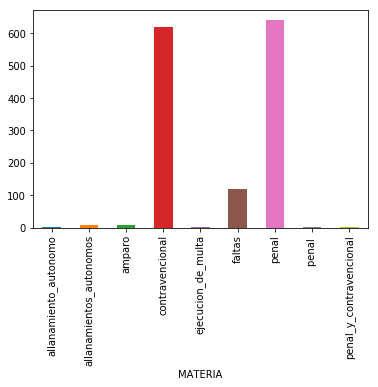

In [146]:
df_xlsx['MATERIA'].groupby(df_xlsx['MATERIA']).count().plot(kind="bar")